In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats as st
import math as math
import datetime as dt

# Импортирование датасетов и  обработка их данных

In [2]:
orders = pd.read_csv('orders.csv', delimiter=',')
visitors = pd.read_csv('visitors.csv', delimiter=',')

In [3]:
orders.head(20)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


Вывод первых 20 строк датафрейма. Датасет содержит информацию о заказах<br>

<li>transactionId — идентификатор заказа;<br>
<li>visitorId — идентификатор пользователя, совершившего заказ;<br>
<li>date — дата, когда был совершён заказ;<br>
<li>revenue — выручка заказа;<br>
<li>group — группа A/B-теста, в которую попал заказ<br>

In [4]:
visitors.head(20)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


Вывод первых 20 строк датафрейма. Датасет содержит информацию о количестве посетитетлей<br>
<li>date — дата;<br>
<li>group — группа A/B-теста;<br>
<li>visitors — количество пользователей в указанную дату в указанной группе A/B-теста

<h3> Датасет Orders

In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Оценка данных. Датасет имеет триннадцать столбцов, 1197 значений, 3 столбца имеет тип int, другие object.

In [6]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

Проверка на пропуски (пропусков не обнаружено)

In [7]:
orders.duplicated().sum()

0

Проверка на явные дубликаты (явных дубликатов не обнаружено)

In [8]:
for nameCol in orders.columns.to_list():
    print(orders[nameCol].unique())

[3667963787 2804400009 2961555356 ... 1807773912 1947021204 3936777065]
[3312258926 3642806036 4069496402 ...  370388673  573423106 2108080724]
['2019-08-15' '2019-08-16' '2019-08-01' '2019-08-22' '2019-08-17'
 '2019-08-23' '2019-08-02' '2019-08-18' '2019-08-24' '2019-08-03'
 '2019-08-25' '2019-08-28' '2019-08-19' '2019-08-06' '2019-08-26'
 '2019-08-29' '2019-08-04' '2019-08-20' '2019-08-09' '2019-08-07'
 '2019-08-30' '2019-08-05' '2019-08-27' '2019-08-21' '2019-08-08'
 '2019-08-10' '2019-08-31' '2019-08-11' '2019-08-12' '2019-08-13'
 '2019-08-14']
[   1650     730     400    9759    2308    2210    1860    1044   13710
    1855    4008    4499    7370   11985   10980   15277    1060     990
   16490    1190     300    1050     632   15185    7555    3488    7620
    5280     700     190     383    1680   22785    2355    2470    6250
   19260     610    2986    1090    9290    2480    3000    2140    3590
    6990    1250    2970   18100     100    2750     570    2978    1440
    786

Проверка на неявные дубликаты

In [9]:
orders["date"] = orders["date"].astype(np.datetime64)
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 105.3 KB


Преобразование поле даты к типу pandas.datetime64

<h3> Датасет visitors

In [10]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Оценка данных. Датасет имеет триннадцать столбцов, 62 значений, 2 столбца имеет тип object, другой int.

In [11]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

Проверка на пропуски (пропусков не обнаружено)

In [12]:
visitors.duplicated().sum()

0

Проверка на явные дубликаты (явных дубликатов не обнаружено)

In [13]:
for nameCol in visitors.columns.to_list():
    print(visitors[nameCol].unique())

['2019-08-01' '2019-08-02' '2019-08-03' '2019-08-04' '2019-08-05'
 '2019-08-06' '2019-08-07' '2019-08-08' '2019-08-09' '2019-08-10'
 '2019-08-11' '2019-08-12' '2019-08-13' '2019-08-14' '2019-08-15'
 '2019-08-16' '2019-08-17' '2019-08-18' '2019-08-19' '2019-08-20'
 '2019-08-21' '2019-08-22' '2019-08-23' '2019-08-24' '2019-08-25'
 '2019-08-26' '2019-08-27' '2019-08-28' '2019-08-29' '2019-08-30'
 '2019-08-31']
['A' 'B']
[719 619 507 717 756 667 644 610 617 406 718 595 748 735 628 361 412 668
 502 575 646 609 468 395 621 722 711 594 577 490 699 713 581 509 770 707
 655 709 654 369 721 543 769 746 544 413 421 737 487 560 656 650 546 378
 679 676 720 531]


Проверка на неявные дубликаты (неявных дубликатов не обнаружено)

In [14]:
visitors["date"] = visitors["date"].astype(np.datetime64)
visitors.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 4.6 KB


Преобразование поле даты к типу pandas.datetime64

### Поиск пересекающихся пользователей в таблице orders и их удаление


In [15]:
ordersGroupA = orders[orders['group'] == 'A']
ordersGroupB = orders[orders['group'] == 'B']

In [16]:
delCnt = 0
for indexA, rowOrderA in ordersGroupA.iterrows():
    for indexB, rowOrderB in ordersGroupB.iterrows():
        if rowOrderA['visitorId'] == rowOrderB['visitorId']:
            orders = orders.drop(orders[orders.visitorId == rowOrderA['visitorId']].index)
            delCnt += 1
            continue
            
print('Deleted ')
print(delCnt)

Deleted 
183


### Вывод <br>
В результате поиска были найдены 183 пересекающихся пользователя

<h3> Создание массива уникальных пар значений дат и групп теста

In [17]:
datesGroups = orders[['date','group']].drop_duplicates()

<h3> Получение агрегированных кумулятивных данных по дням о
заказах

In [18]:
ordersAgreagated = datesGroups.apply(
    lambda x: 
        orders[np.logical_and(
            orders['date'] <= x['date'], 
            orders['group'] == x['group'])
        ].
        agg({'date' : 'max', 
             'group' : 'max', 
             'transactionId' : 'nunique', 
             'visitorId' : 'nunique', 
             'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
ordersAgreagated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


<h3> Получение агрегированных кумулятивных данных по дням о
посетителях

In [19]:
visitorsAggregated = datesGroups.apply(lambda x: 
    visitors[np.logical_and(
        visitors['date'] <= x['date'], 
        visitors['group'] == x['group'])
    ].
    agg({'date' : 'max', 
         'group' : 'max', 
         'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


<h3> Объединение данных в одной таблице

In [20]:
cumulativeData = ordersAgreagated
cumulativeData = cumulativeData.join(visitorsAggregated.drop(['date', 'group'], axis=1), sort=False)
cumulativeData.rename(columns={'transactionId': 'orders', 'visitorId': 'byers'}, inplace=True)
cumulativeData.head()

,date,group,orders,byers,revenue,visitors
55,2019-08-01,A,23,19,142779,719
66,2019-08-01,B,17,17,59758,713
175,2019-08-02,A,42,36,234381,1338
173,2019-08-02,B,40,39,221801,1294
291,2019-08-03,A,66,60,346854,1845


Изменив названия столбцов, данные были объединены в одну таблицу

<h3> Задание по вариантам

In [21]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B']

Разделение получившегося датафрейма

In [22]:
cumulativeRevenueA.head()

,date,group,orders,byers,revenue,visitors
55,2019-08-01,A,23,19,142779,719
175,2019-08-02,A,42,36,234381,1338
291,2019-08-03,A,66,60,346854,1845
499,2019-08-04,A,77,71,388030,2562
719,2019-08-05,A,99,92,474413,3318


In [23]:
cumulativeRevenueB.head()

,date,group,orders,byers,revenue,visitors
66,2019-08-01,B,17,17,59758,713
173,2019-08-02,B,40,39,221801,1294
383,2019-08-03,B,54,53,288850,1803
498,2019-08-04,B,68,66,385740,2573
699,2019-08-05,B,89,87,475648,3280


### Построение графика

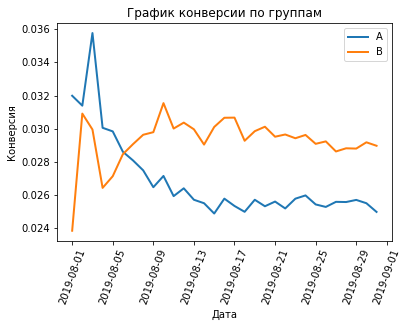

In [24]:
fig, ax = plt.subplots()

ax.plot(cumulativeRevenueA['date'], cumulativeRevenueA['orders']/cumulativeRevenueA['visitors'], linewidth=2.0, label = 'A')
ax.plot(cumulativeRevenueB['date'], cumulativeRevenueB['orders']/cumulativeRevenueB['visitors'], linewidth=2.0, label = 'B')

ax.set_title('График конверсии по группам')

ax.set_xlabel('Дата')
ax.set_ylabel('Конверсия')

ax.tick_params(axis='x', rotation=70)

ax.legend()

plt.show()

Согласно варианту нужно было изобразить график конверсии по группам А и B. По оси
x – date, по оси y – конверсия.

<h3> Вывод

На основании полученного графика можем сделать вывод, что:<br>
<li>У группы А с течением времени наблюдается спад количества заказов к общему количеству посетителей, при этом этот спад происходит довольно резко и в последствии держится стабильно низко<br>
<li>У группы B с течением времени наблюдается быстрый рост данного показателя в первые два дня, затем резкий спад и возврат к среднему значению

### Часть 2

<h3> Датасет log_exp


In [25]:
log_exp = pd.read_csv('logs_exp.csv', delimiter='\t')

In [26]:
log_exp.head(20)

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
5,CartScreenAppear,6217807653094995999,1564055323,248
6,OffersScreenAppear,8351860793733343758,1564066242,246
7,MainScreenAppear,5682100281902512875,1564085677,246
8,MainScreenAppear,1850981295691852772,1564086702,247
9,MainScreenAppear,5407636962369102641,1564112112,246


Вывод первых 20 строк датафрейма. Датасет  информацию о действиях пользователя<br>

<li>EventName — название события;<br>
<li>DeviceIDHash — уникальный идентификатор пользователя;<br>
<li>EventTimestamp — время события;<br>
<li>ExpId — номер эксперимента: 246 и 247 — контрольные группы, а 248— экспериментальная.<br>

In [27]:
log_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


Оценка данных. Датасет имеет триннадцать столбцов, 244126 значений, 3 столбца имеет тип int, другой object

In [28]:
log_exp.isna().sum()

EventName         0
DeviceIDHash      0
EventTimestamp    0
ExpId             0
dtype: int64

Проверка на пропуски (пропусков не обнаружено)

In [29]:
log_exp.duplicated().sum()

413

Проверка на явные дубликаты (обнаружено 413 дубликатов)

In [30]:
log_exp = log_exp.drop_duplicates().reset_index()
log_exp.duplicated().sum()

0

Удаление явных дубликатов

In [31]:
for nameCol in log_exp.columns.to_list():
    print(log_exp[nameCol].unique())

[     0      1      2 ... 244123 244124 244125]
['MainScreenAppear' 'PaymentScreenSuccessful' 'CartScreenAppear'
 'OffersScreenAppear' 'Tutorial']
[4575588528974610257 7416695313311560658 3518123091307005509 ...
 6660805781687343085 7823752606740475984 3454683894921357834]
[1564029816 1564053102 1564054127 ... 1565212483 1565212498 1565212517]
[246 248 247]


Проверка на неявные дубликаты (неявных дубликатов не обнаружено)


<h3> Вывод на экран количества каждого события в порядке убывания
частоты.


In [32]:
dfP5 = log_exp
dfP5['Count'] = [1 for i in range(0, len(dfP5))]
dfP5 = dfP5[['EventName', 'Count']]
print(dfP5.groupby('EventName').count().sort_values(by='Count', ascending=False))

                          Count
EventName                      
MainScreenAppear         119101
OffersScreenAppear        46808
CartScreenAppear          42668
PaymentScreenSuccessful   34118
Tutorial                   1018


### Вывод:
Чаще всего встречается событие MainScreenAppear

<h3> Подсчет количества пользователей, совершавших каждое из  событий

In [33]:
print(log_exp.groupby('EventName').agg(
    {'DeviceIDHash': ['nunique']}))

                        DeviceIDHash
                             nunique
EventName                           
CartScreenAppear                3749
MainScreenAppear                7439
OffersScreenAppear              4613
PaymentScreenSuccessful         3547
Tutorial                         847


### Вывод: <br>
<li> Событие CartScreenAppear было совершено 3749 раз <br>
<li> Событие MainScreenAppear было совершено 7439 раз <br>
<li> Событие OffersScreenAppear было совершено 4613 раз <br>
<li> Событие PaymentScreenSuccessful было совершено 3547 раз <br>
<li> Событие Tutorial было совершено 847 раз <br>

<h3> Определение количества пользователей в каждой группе

In [34]:

users = log_exp.groupby('ExpId')['DeviceIDHash'].nunique().reset_index() 
users

,ExpId,DeviceIDHash
0,246,2489
1,247,2520
2,248,2542


### Вывод: <br>
<li> В группе "246" 2489 уникальных пользователя <br>
<li> В группе "247" 2520 уникальных пользователя <br>
<li> В группе "248" 2542 уникальных пользователя <br>

<h3> Поиск пользователей, которые пересекаются (присутствуют в обоих
группах)


In [35]:
a = log_exp.groupby('DeviceIDHash').agg(
    {'ExpId': ['nunique']})
print(log_exp.groupby('DeviceIDHash').agg(
    {'ExpId': ['nunique']}))

                      ExpId
                    nunique
DeviceIDHash               
6888746892508752          1
6909561520679493          1
6922444491712477          1
7435777799948366          1
7702139951469979          1
...                     ...
9217594193087726423       1
9219463515465815368       1
9220879493065341500       1
9221926045299980007       1
9222603179720523844       1

[7551 rows x 1 columns]


In [36]:
for el in a.itertuples():
    a1, a2 = el
    if a2 > 1:
        print(a1)

### Вывод: <br>
Пересекающиеся пользователи не были найдены

<h3>Проведение А/А теста

Условие:<br>
Нулевая гипотеза - группы 246 и 247 не имеют различий<br>
Альтернативная гипотеза - группа 246 и 247 отличаются

In [37]:
logs = log_exp.rename(columns={'EventName':'event_name','DeviceIDHash': 'user_id', 'EventTimestamp': 'event_time','ExpId':'group'})
logs.columns

Index(['index', 'event_name', 'user_id', 'event_time', 'group', 'Count'], dtype='object')

In [43]:
def ab_test(logs, groups, alpha):
    # уникальные пользователи в каждой 
    users = [logs.query('group == @group_id')['user_id'].nunique() for group_id in groups]
    # экспериментальные группы для каждого события, количество пользователей и доля
    for event in logs.event_name.unique():
        events = [logs.query('group == %d and event_name == "%s"' % (group_id, event))['user_id'].nunique() for group_id in groups]
        
        p1 = events[0] / users[0] #считаем долю для 1 группы
        p2 = events[1] / users[1] #считаем долю для 2 группы
        
        p_combined = sum(events) / sum(users) 
        
        difference = p1 - p2 
        
        z_value = difference / math.sqrt(
            p_combined * (1 - p_combined) * (1 / users[0] + 1 / users[1]))
        
        distr = st.norm(0, 1)
        p_value = (1 - distr.cdf(abs(z_value))) * 2 
        
        print('Событие:',event)
        print('Доли:',p1, p2)
        print('p-значение: ', p_value)
        if p_value < alpha:
            print('Отвергаем нулевую гипотезу по событию %s: между долями есть значимая разница' % (event))
        else:
            print('Не получилось отвергнуть нулевую гипотезу по событию %s: нет оснований считать доли разными' % (event))
            
        print(' ')

In [44]:
ab_test(logs, [246, 247], 0.05)

Событие: MainScreenAppear
Доли: 0.9867416633186018 0.984920634920635
p-значение:  0.5856639791209877
Не получилось отвергнуть нулевую гипотезу по событию MainScreenAppear: нет оснований считать доли разными
 
Событие: PaymentScreenSuccessful
Доли: 0.4829248694254721 0.4603174603174603
p-значение:  0.10902546202332886
Не получилось отвергнуть нулевую гипотезу по событию PaymentScreenSuccessful: нет оснований считать доли разными
 
Событие: CartScreenAppear
Доли: 0.5102450783447168 0.49206349206349204
p-значение:  0.19817540651836918
Не получилось отвергнуть нулевую гипотезу по событию CartScreenAppear: нет оснований считать доли разными
 
Событие: OffersScreenAppear
Доли: 0.620731217356368 0.6071428571428571
p-значение:  0.3233225048227193
Не получилось отвергнуть нулевую гипотезу по событию OffersScreenAppear: нет оснований считать доли разными
 
Событие: Tutorial
Доли: 0.11209321012454801 0.11349206349206349
p-значение:  0.8756574258016974
Не получилось отвергнуть нулевую гипотезу по 

### Проведение А/В теста

Условие:<br>
Нулевая гипотеза - группы 246 и 248 не имеют различий<br>
Альтернативная гипотеза - группа 246 и 248 отличаются

In [45]:
ab_test(logs, [246, 248], 0.05)

Событие: MainScreenAppear
Доли: 0.9867416633186018 0.9838709677419355
p-значение:  0.39774960182882513
Не получилось отвергнуть нулевую гипотезу по событию MainScreenAppear: нет оснований считать доли разными
 
Событие: PaymentScreenSuccessful
Доли: 0.4829248694254721 0.466168371361133
p-значение:  0.23403912852637143
Не получилось отвергнуть нулевую гипотезу по событию PaymentScreenSuccessful: нет оснований считать доли разными
 
Событие: CartScreenAppear
Доли: 0.5102450783447168 0.487411487018096
p-значение:  0.10534150642722295
Не получилось отвергнуть нулевую гипотезу по событию CartScreenAppear: нет оснований считать доли разными
 
Событие: OffersScreenAppear
Доли: 0.620731217356368 0.6050354051927616
p-значение:  0.2531656758489338
Не получилось отвергнуть нулевую гипотезу по событию OffersScreenAppear: нет оснований считать доли разными
 
Событие: Tutorial
Доли: 0.11209321012454801 0.1109362706530291
p-значение:  0.8962914725257976
Не получилось отвергнуть нулевую гипотезу по со

### Вывод по лабораторной работе:

В ходе выполнения лабораторной работы были изучены алгоритмы для проведения A/B тестирования для
принятия решений.<br>
Была проведена предварительная обработка для трех датасетов.<br>
акже был создан массив уникальных пар значений дат и групп теста, получены агрегированные кумулятивные данные по дням о заказах и по дням о посетителях. Произведено объединение данных в одной таблице: date, group, orders, buyers, revenue, visitors.<br>
Затем было выполнено задание по вариантам. В ходе задания по вариантам был изображен  график конверсии по группам А и B.<br>
Во второй части задания был выполнен вывод на экран каждого события в порядке убывания частоты, подсчитано сколько пользователей совершали каждое из этих событий, определено количество пользователей в каждой группе, произведен поиск пользователей, которые пересекаются в группа, но такие не выявлены. <br>
Затем были выполнены А/А и А/В тесты. A/B-тестирование — обязательный подход к проверке продуктовых гипотез. В зависимости от ситуации мы используем несколько методов оценки, но в данной работе использовали Z-тест — класс методов статистической проверки гипотез (статистических критериев), основанных на нормальном распределении. Z-тест подразумевает проверку гипотезы, которая устанавливает, отличаются ли средние значения двух наборов данных друг от друга, когда дается дисперсия.



### Дополнительное задание

Изобразить точечный график числа заказов по
пользователям. Для этого с помощью groupby получить таблицу ordersByUsers.

In [47]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsers.columns = ['visitorId', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,visitorId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


### Построение графика

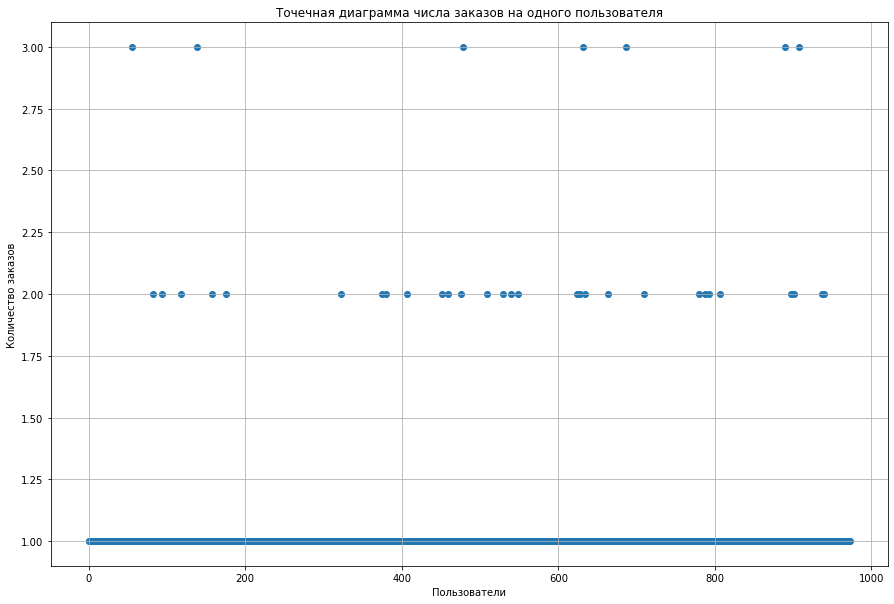

In [48]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(15,10))
plt.ylabel('Количество заказов')
plt.xlabel('Пользователи')
plt.title('Точечная диаграмма числа заказов на одного пользователя')
plt.grid()
plt.scatter(x_values, ordersByUsers['orders']);

### Вывод

На основании полученного графика можем сделать вывод, что:<br>
<li>Большинство посетителей совершили только один заказ<br>
<li>Посетителей, совершивших три заказа почти нет<br>
<li>Посетителей, совершивших больше трех заказов не существует